In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import datetime as dt

In [137]:
df = pd.read_csv('/Users/lailasprejer/metis/metisgh/nyc18_ds17/challenges/challenges_data/2013_movies.csv')

Plot domestic total gross over time.

In [4]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


Text(0.5, 1.0, 'Domestic Total Gross over time')

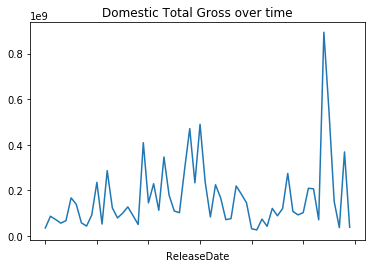

In [13]:
df.groupby('ReleaseDate')['DomesticTotalGross'].sum().plot()
plt.title('Domestic Total Gross over time')

Plot runtime vs. domestic total gross.

Text(0.5, 1.0, 'Runtime vs domestic total gross')

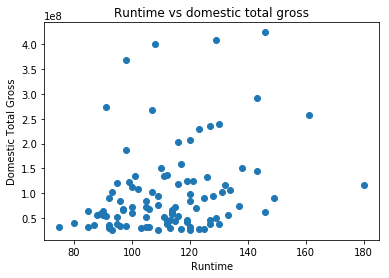

In [234]:
plt.scatter(df['Runtime'],df['DomesticTotalGross'])
plt.xlabel('Runtime')
plt.ylabel('Domestic Total Gross')
plt.title('Runtime vs domestic total gross')

Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.

In [20]:
df.groupby('Rating')['Runtime','DomesticTotalGross'].mean().reset_index()

,Rating,Runtime,DomesticTotalGross
0,G,107.000000,2.684928e+08
1,PG,99.933333,1.311357e+08
2,PG-13,117.510638,1.114498e+08
3,R,110.729730,6.989243e+07


Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross.

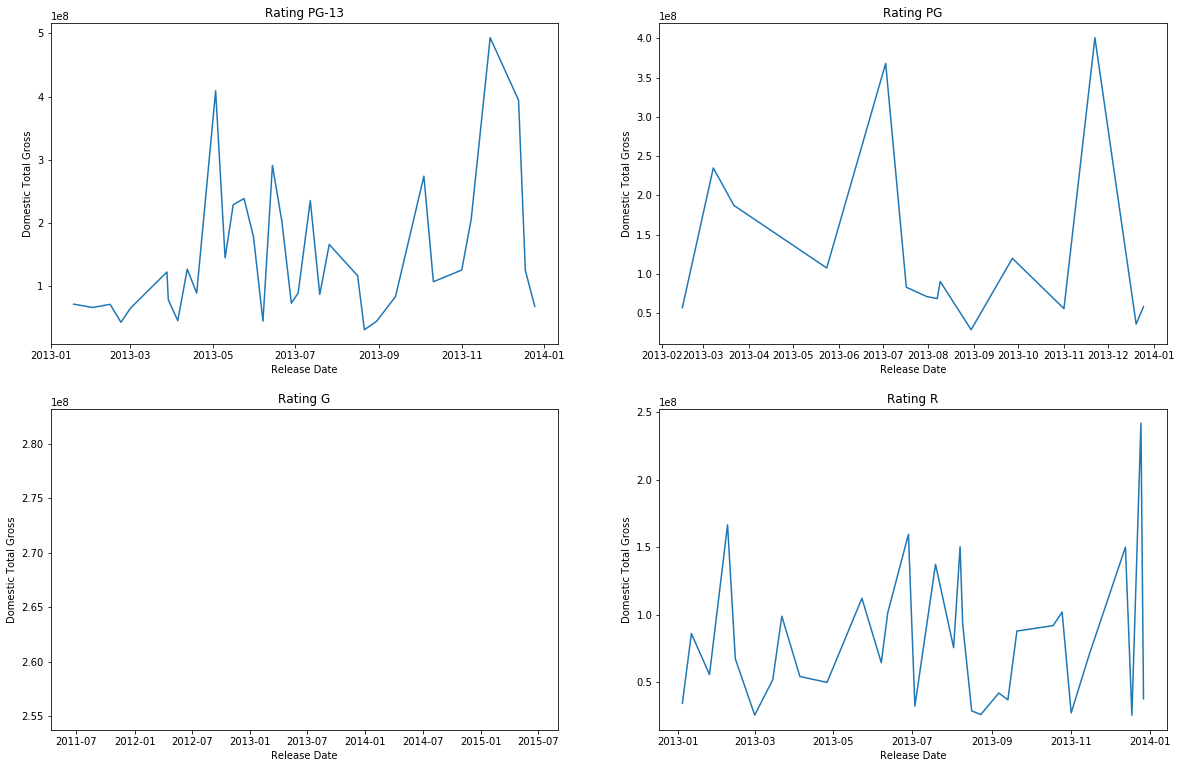

In [241]:
group_rating=df.groupby(['Rating','ReleaseDate'])['DomesticTotalGross'].sum()
ratings=df['Rating'].unique()
plt.figure(figsize=[20,13])

for i in range(len(ratings)):
    plt.subplot(math.ceil(len(ratings)/2),2,i+1)
    plt.plot(group_rating[ratings[i]])
    plt.xlabel('Release Date')
    plt.ylabel('Domestic Total Gross')
    plt.title('Rating %s' %ratings[i])


What director in your dataset has the highest gross per movie?

In [126]:
group = (df
         .groupby('Director')
         .agg({'Title':['count'], 'DomesticTotalGross':['sum']})).reset_index()

In [242]:
group['Avg'] = (group['DomesticTotalGross']['sum']/group['Title']['count'])

group[['Director','Avg']].sort_values(by='Avg',ascending=False).head(1)

,Director,Avg
,,
27,Francis Lawrence,424668047.0


Bin your dataset into months and make a bar graph of the mean domestic total gross by month. Error bars will represent the standard error of the mean.

Title of graph should include: Mean Domestic Total Gross by Month in 2013

Topic for consideration: what is the correct formula for the standard error of the mean? Examine the error bars and see if they are "reasonable."

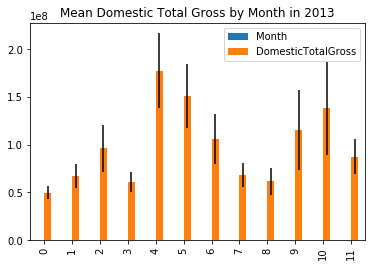

In [290]:
df["ReleaseDate"] = pd.to_datetime(df['ReleaseDate'], 
                                            format="%Y/%m/%d %H:%M:%S")
df["Month"]=df['ReleaseDate'].dt.month

gross_month=df.groupby('Month')['DomesticTotalGross'].mean().reset_index()

std = df.groupby('Month')['DomesticTotalGross'].std().reset_index()
count = df.groupby('Month')['DomesticTotalGross'].count().reset_index()
sme = []
for i in range(len(std)):
    sme.append(std['DomesticTotalGross'][i]/math.sqrt(count['DomesticTotalGross'][i]))

smedf = pd.DataFrame({'DomesticTotalGross':sme})    
    
    
gross_month.plot(kind='bar', yerr=smedf)
plt.title('Mean Domestic Total Gross by Month in 2013')
plt.show()